## Elementos finitos linear 1D

## Montar a matrix de massa

In [57]:
ϕ₁(x, a, b)  = (b-x)/(b-a)
ϕ₂(x, a, b)  = (x-a)/(b-a)
dϕ₁(x, a, b)  = 1/(a-b)
dϕ₂(x, a, b)  = 1/(b-a)
mass_matrix(a, b) = [(b-a)/3 (b-a)/6; (b-a)/6 (b-a)/3]
stiff_matrix(a, b)= [2/(a-b)^2 -2/(a-b)^2;-2/(a-b)^2 2/(a-b)^2 ]

stiff_matrix (generic function with 1 method)

In [58]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [59]:
stiff_matrix(-1,1)

2x2 Array{Float64,2}:
  0.5  -0.5
 -0.5   0.5

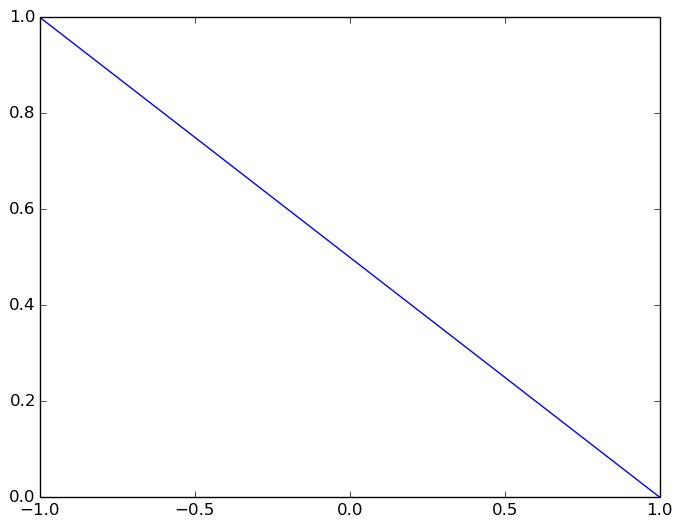

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2365de7f90>

In [60]:
x = linspace(-1,1,101)
y1=[ϕ₁(x,-1,1) for x in linspace(-1,1,101)]
plot(x,y1)

In [61]:
mass_matrix(-1,1)

2x2 Array{Float64,2}:
 0.666667  0.333333
 0.333333  0.666667

In [62]:
mass_matrix(0,1)

2x2 Array{Float64,2}:
 0.333333  0.166667
 0.166667  0.333333

In [63]:
a = -1.0
b = 1.0
Nel = 5
xn = [linspace(a,b,Nel+1);]
Ndof = size(xn,1);

In [64]:
xn

6-element Array{Float64,1}:
 -1.0
 -0.6
 -0.2
  0.2
  0.6
  1.0

In [65]:
Nel = size(xn,1)-1
dof_map = zeros(Int, 2, Nel)
for i = 1:Nel
    dof_map[1,i] = i
    dof_map[2,i] = i+1
end
dof_map

2x5 Array{Int64,2}:
 1  2  3  4  5
 2  3  4  5  6

In [66]:
M = zeros(Ndof, Ndof)

for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            M[kg,ig] += Me[k,i]
        end
    end
end
M

dM = zeros(Ndof, Ndof)

for e = 1:Nel
    dMe = stiff_matrix(xn[e], xn[e+1])
    for i = 1:2
        ig = dof_map[i,e]
        for k = 1:2
            kg = dof_map[k,e]
            dM[kg,ig] += dMe[k,i]
        end
    end
end
dM
dM = dM - M
            

6x6 Array{Float64,2}:
  12.3667  -12.5667    0.0       0.0       0.0       0.0   
 -12.5667   24.7333  -12.5667    0.0       0.0       0.0   
   0.0     -12.5667   24.7333  -12.5667    0.0       0.0   
   0.0       0.0     -12.5667   24.7333  -12.5667    0.0   
   0.0       0.0       0.0     -12.5667   24.7333  -12.5667
   0.0       0.0       0.0       0.0     -12.5667   12.3667

## Montar o lado direito da equação:

In [67]:
#wolfram problem : y'' + y = -4*pi^2*cos(2*pi*x) + cos(2*pi*x),y'(-1) = 0,y'(1)=0
fun(x) = -4*pi^2*cos(2*pi*x) + cos(2*pi*x)
resp(x) = cos(2*pi*x)
dresp(x)= -2*pi*sin(2*pi*x)
#fun(x) = -8*pi^2*cos(2*pi*x) + 2*cos(2*pi*x)
#resp(x) = 2*cos(2*pi*x)


dresp (generic function with 1 method)

In [68]:
fe = fun(xn)

6-element Array{Float64,1}:
 -38.4784
  31.1297
 -11.8905
 -11.8905
  31.1297
 -38.4784

In [69]:
xn

6-element Array{Float64,1}:
 -1.0
 -0.6
 -0.2
  0.2
  0.6
  1.0

In [70]:
F = zeros(Ndof)
for e = 1:Nel
    Me = mass_matrix(xn[e], xn[e+1])
    Fe = Me * fun(xn[e:(e+1)])
    for i = 1:2
        ig = dof_map[i,e]
        F[ig] += Fe[i]
    end
end
        

# Calculando a integral de maneira mais exata:
using Jacobi
Q = 20
z = zgj(Q)
w = wgj(z)

F2 = zeros(Ndof)
for e = 1:Nel
    Fe1 = 0.0
    Fe2 = 0.0
    a1 = xn[e]
    b1 = xn[e+1]
    x = ( (1-z)*a1 + (1+z)*b1 ) / 2
    J = (b1-a1) / 2
    for q = 1:Q
        f = fun(x[q])
        Fe1 += J * w[q] * f * ϕ₁(x[q], a1, b1)
        Fe2 += J * w[q] * f * ϕ₂(x[q], a1, b1)
    end
    i1 = dof_map[1,e]
    i2 = dof_map[2,e]
    F2[i1] += Fe1
    F2[i2] += Fe2
end



In [71]:
F = -F

6-element Array{Float64,1}:
  3.05514
 -4.94332
  1.88818
  1.88818
 -4.94332
  3.05514

In [72]:
F2 = -F2

6-element Array{Float64,1}:
  4.40799
 -7.13227
  2.72428
  2.72428
 -7.13227
  4.40799

## Solução do problema

In [73]:
u = dM\F

6-element Array{Float64,1}:
  0.135583 
 -0.109689 
  0.0418976
  0.0418976
 -0.109689 
  0.135583 

In [74]:
hcat(F,F2)

6x2 Array{Float64,2}:
  3.05514   4.40799
 -4.94332  -7.13227
  1.88818   2.72428
  1.88818   2.72428
 -4.94332  -7.13227
  3.05514   4.40799

In [75]:
u2 = dM\F2

6-element Array{Float64,1}:
  0.195621 
 -0.158261 
  0.0604502
  0.0604502
 -0.158261 
  0.195621 

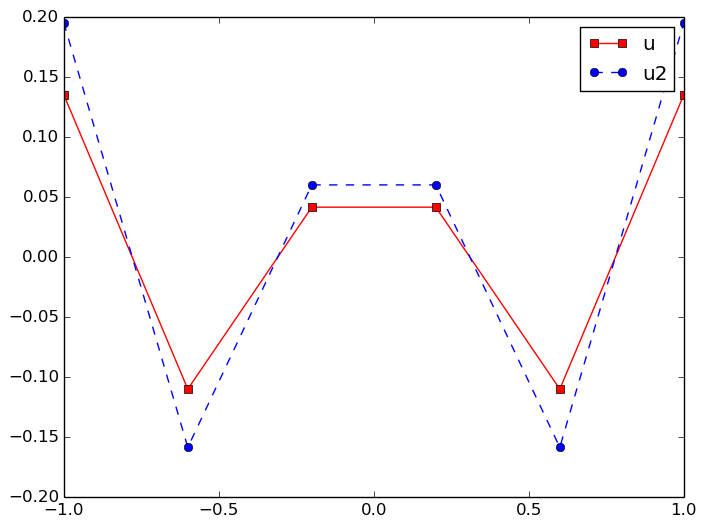

6-element Array{Float64,1}:
  0.135583 
 -0.109689 
  0.0418976
  0.0418976
 -0.109689 
  0.135583 

In [78]:
using PyPlot
xx = linspace(a, b, 201)
#plot(xx, resp(xx))
plot(xn, u, "rs-",label = "u")
plot(xn, u2, "bo--",label = "u2")
legend()
u

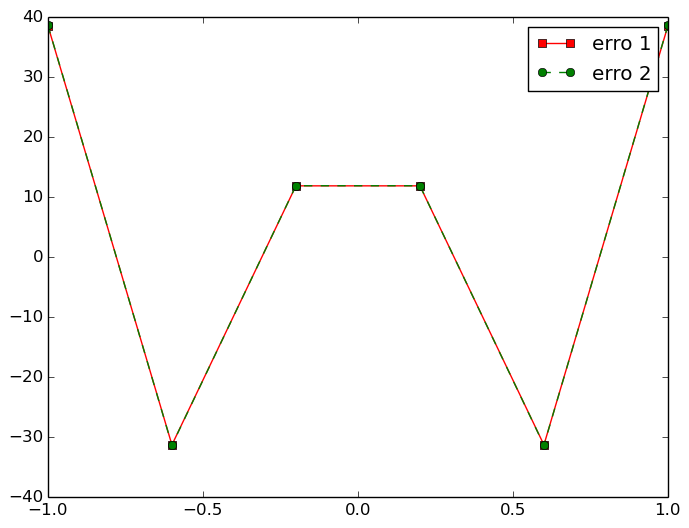

PyObject <matplotlib.legend.Legend object at 0x7f2365f9f3d0>

In [77]:
e1 = u - fe
e2 = u2 - fe
figure()
plot(xn, e1, "rs-",label="erro 1")
plot(xn, e2, "go--",label="erro 2")
legend()